<!--
    Licensed to the Apache Software Foundation (ASF) under one
    or more contributor license agreements.  See the NOTICE file
    distributed with this work for additional information
    regarding copyright ownership.  The ASF licenses this file
    to you under the Apache License, Version 2.0 (the
    "License"); you may not use this file except in compliance
    with the License.  You may obtain a copy of the License at

      http://www.apache.org/licenses/LICENSE-2.0

    Unless required by applicable law or agreed to in writing,
    software distributed under the License is distributed on an
    "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
    KIND, either express or implied.  See the License for the
    specific language governing permissions and limitations
    under the License.
-->

# Interactive Beam Examples

In [1]:
import apache_beam as beam
from apache_beam.runners.interactive import interactive_runner

In [2]:
p = beam.Pipeline(interactive_runner.InteractiveRunner())
init_pcoll = p |  beam.Create(range(10))
squares = init_pcoll | 'Square' >> beam.Map(lambda x: x*x)
cubes = init_pcoll | 'Cube' >> beam.Map(lambda x: x**3)
result = p.run()
result.wait_until_finish()

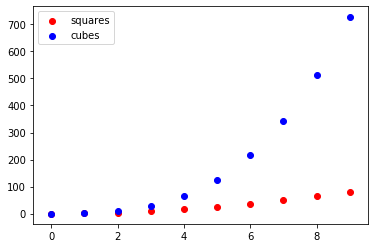

In [3]:
init_list = list(range(10))
squares_list = list(result.get(squares))
cubes_list = list(result.get(cubes))

squares_list.sort()
cubes_list.sort()

!pip install matplotlib

%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(init_list, squares_list, label='squares', color='red')
plt.scatter(init_list, cubes_list, label='cubes', color='blue')
plt.legend(loc='upper left')
plt.show()

In [4]:
class AverageFn(beam.CombineFn):
  def create_accumulator(self):
    return (0.0, 0)

  def add_input(self, sum_count, input):
    (sum, count) = sum_count
    return sum + input, count + 1

  def merge_accumulators(self, accumulators):
    sums, counts = zip(*accumulators)
    return sum(sums), sum(counts)

  def extract_output(self, sum_count):
    (sum, count) = sum_count
    return sum / count if count else float('NaN')

In [5]:
average_square = squares | 'Average Square' >> beam.CombineGlobally(AverageFn())
average_cube = cubes | 'Average Cube' >> beam.CombineGlobally(AverageFn())

In [6]:
result = p.run()